# 前処理


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')
%cd /content/drive/'My Drive'/'zemi_report'/

/content/drive/My Drive/zemi_report


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
%cd /content/drive/'My Drive'/'zemi_report'

df=pd.read_csv('review_text.csv',header=0)
A=df.values
print(A.shape)

B=[]
for i in range(0,23486):
    if str(A[i,0])=='nan':
        np.delete(A,i,axis=0)
    else:
        B.append(A[i])
        
C=np.array(B)
print(C.shape)
df=pd.DataFrame(C)
#これがデータフレーム
df=df.rename(columns={0:'Review Text',1:'Recommended IND'})
df['Review Text']=df['Review Text'].astype('str')
df['Recommended IND']=df['Recommended IND'].astype('f')

/content/drive/My Drive/zemi_report
(23486, 2)
(22641, 2)


In [ ]:
import re
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords


stop=stopwords.words("english")
def stemming(text):
    stemmer = nltk.PorterStemmer()
    stem_ls=[]
    for i in text.split():
        try:
            stem_ls.append(stemmer.stem(i))
        except:
            stem_ls.append(i)
    stemmed =' '.join(stem_ls)
    return stemmed
  
def emotional(text):
    pattern = re.compile(r"(?::|::|;|=)(?:-|_)?(?:\)|\(|D|P)")
    emoticons = pattern.findall(text)
    lower = text.lower()
    removed = re.sub(r"[\W]+", " ", lower)
    emoticons = " ".join(emoticons)
    connected = removed + ' ' + emoticons
    return connected

def stoped(text):
    words = []
    for word in text.split(' '):
#もしstop引っかかってなかったらリストに放り込む
        if word not in stop:
            words.append(word)
    text = " ".join(words)
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df['Review Text']=df['Review Text'].apply(stemming)
df['Review Text']=df['Review Text'].apply(stoped)
df['Review Text']=df['Review Text'].apply(emotional)

# 機械学習で自然言語処理(NLP)

In [ ]:
!pip install mglearn

     |████████████████████████████████| 542kB 2.8MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.7-py2.py3-none-any.whl size=582705 sha256=de30627206c329a101154b2ee4adbbff04317ef6b1f1a1e748b926f0d1463483
  Stored in directory: /root/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


In [ ]:
def print_metrics(model,pd,label):
    from sklearn import metrics
    pred = model.predict(pd)
    print('accuracy:%.3f'% metrics.accuracy_score(label,pred))
    print('recall:%.3f'% metrics.recall_score(label,pred,average='macro'))
    print('precision: %.3f' % metrics.precision_score(label, pred, average='macro')) 
    print('f1_score: %.3f' % metrics.f1_score(label, pred, average='macro')) 

In [ ]:
def plot_cm(confmat):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
    plt.title('predicted label')
    plt.ylabel('true label')
    plt.tight_layout() # ラベルが重ならないように自動調整
    plt.show()

In [ ]:
#必要なモジュールのインポート
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV,cross_validate
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn import metrics
from sklearn.metrics import recall_score,precision_score,accuracy_score,f1_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import mglearn

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
cv = CountVectorizer(max_df=0.3,min_df=10)
cv.fit(df['Review Text'])
#bowに変換
bow=cv.transform(df['Review Text'])
bow=bow.toarray()
feature_names = cv.get_feature_names()
#TFIDFに変換
tfidf=TfidfTransformer(sublinear_tf=True)
X_tfidf=tfidf.fit_transform(bow.astype('f')).toarray()

In [ ]:
X_tfidf_train,X_tfidf_test,y_tfidf_train,y_tfidf_test = train_test_split(X_tfidf,df['Recommended IND'],test_size=0.3,random_state=9)
kf_5=StratifiedKFold(n_splits=5,shuffle=True,random_state=0)

0.01
accuracy: 0.8233216301851634
recall_macro: 0.8266274247288375
precision_macro 0.7327010851154407
f1_macro 0.7576353955575261


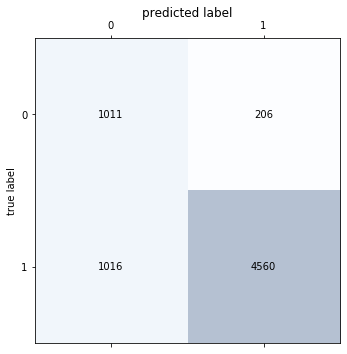


0.1
accuracy: 0.8403584408499931
recall_macro: 0.8382543798349721
precision_macro 0.7489520736572639
f1_macro 0.775830952228524


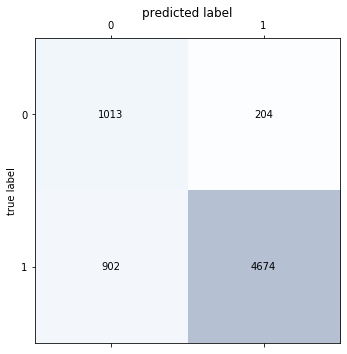


1.0
accuracy: 0.8591616736663239
recall_macro: 0.8478577136772623
precision_macro 0.7685311834482237
f1_macro 0.7957926173356064


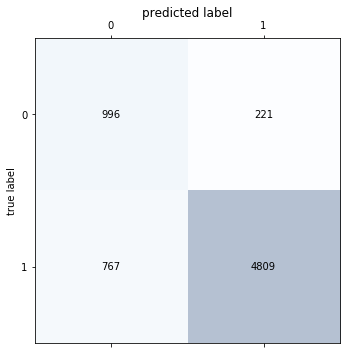


2.0
accuracy: 0.8605499849189655
recall_macro: 0.8421008681077854
precision_macro 0.7692138846974801
f1_macro 0.7952659041392355


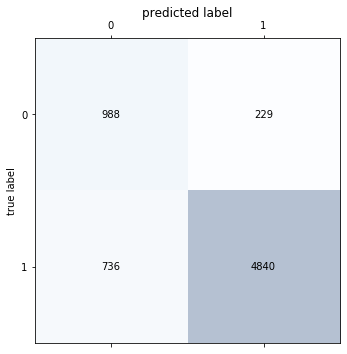


3.0
accuracy: 0.8608026096659975
recall_macro: 0.8379419385139577
precision_macro 0.7690252196515466
f1_macro 0.7942000944685846


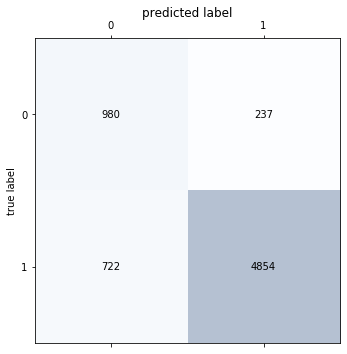


4.0
accuracy: 0.8605501441906164
recall_macro: 0.8334741106948564
precision_macro 0.768215695483174
f1_macro 0.7925023515195759


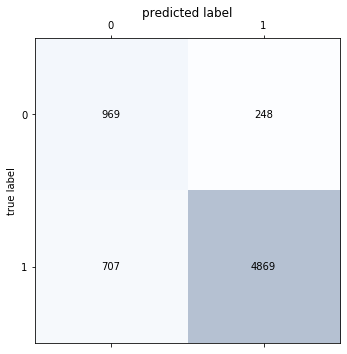


5.0
accuracy: 0.8604239214074039
recall_macro: 0.8305661939323995
precision_macro 0.7677832260841909
f1_macro 0.7914250085078113


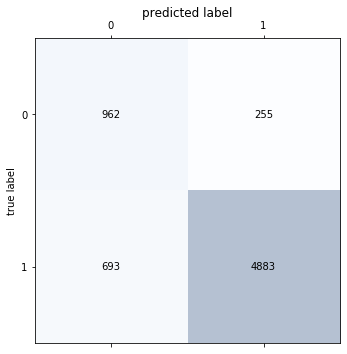

In [ ]:

param_grid=[0.01,0.1,1.0,2.0,3.0,4.0,5.0]
score=['accuracy','recall_macro','precision_macro','f1_macro']
for i in param_grid:
    scores=cross_validate(LogisticRegression(C=i,class_weight='balanced'),X_tfidf_train,y_tfidf_train,cv=kf_5,scoring=score)
    print(i)
    print('accuracy:',scores['test_accuracy'].mean())
    print('recall_macro:',scores['test_recall_macro'].mean())
    print('precision_macro',scores['test_precision_macro'].mean())
    print('f1_macro',scores['test_f1_macro'].mean())
    lr=LogisticRegression(C=i,class_weight='balanced')
    lr.fit(X_tfidf_train,y_tfidf_train)
    cm=confusion_matrix(y_tfidf_test,lr.predict(X_tfidf_test))
    plot_cm(cm)
    print()

accuracy:0.855
recall:0.840
precision: 0.761
f1_score: 0.788


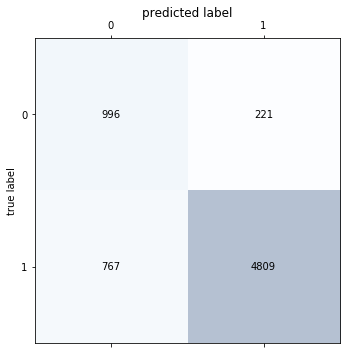

In [ ]:
lr=LogisticRegression(C=1.0,class_weight='balanced')
lr.fit(X_tfidf_train,y_tfidf_train)
cm1=confusion_matrix(y_tfidf_test,lr.predict(X_tfidf_test))
print_metrics(lr,X_tfidf_test,y_tfidf_test)
plot_cm(cm1)

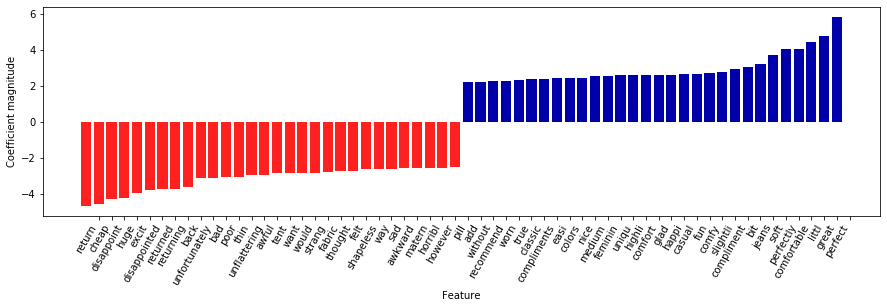

In [ ]:
import mglearn
mglearn.tools.visualize_coefficients(lr.coef_,feature_names,n_top_features=30)

10
accuracy: 0.8517793928365585
recall_macro: 0.6767285360656083
precision_macro 0.7632741195718762
f1_macro 0.7044939456182526


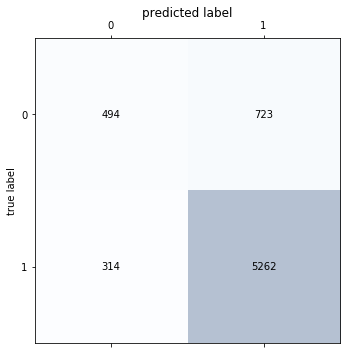


50
accuracy: 0.8582782535465316
recall_macro: 0.6417453388741231
precision_macro 0.8266224731801153
f1_macro 0.6775272099328861


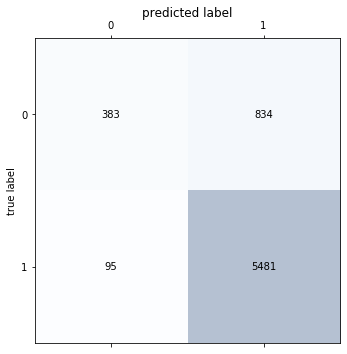


100
accuracy: 0.8569534120467104
recall_macro: 0.6336517961094972
precision_macro 0.832683105127803
f1_macro 0.6679470033598791


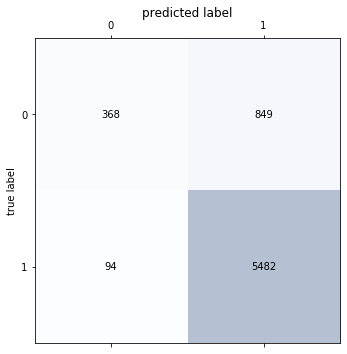


500
accuracy: 0.8568272290814107
recall_macro: 0.6299366881413188
precision_macro 0.8396927689643656
f1_macro 0.6639531537782039


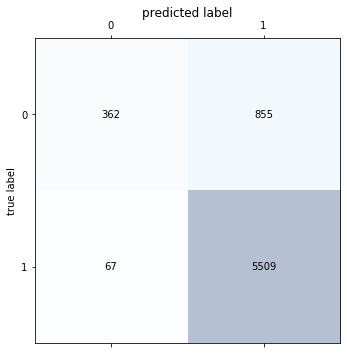

In [ ]:
n=[10,50,100,500]
score=['accuracy','recall_macro','precision_macro','f1_macro']
for i in n:
    scores=cross_validate(RandomForestClassifier(criterion='entropy',class_weight='balanced',n_estimators=i),X_tfidf_train,y_tfidf_train,
                          cv=kf_5,scoring=score)
    print(i)
    print('accuracy:',scores['test_accuracy'].mean())
    print('recall_macro:',scores['test_recall_macro'].mean())
    print('precision_macro',scores['test_precision_macro'].mean())
    print('f1_macro',scores['test_f1_macro'].mean())
    rfc=RandomForestClassifier(criterion='entropy',class_weight='balanced',n_estimators=i)
    rfc.fit(X_tfidf_train,y_tfidf_train)
    cm=confusion_matrix(y_tfidf_test,rfc.predict(X_tfidf_test))
    plot_cm(cm)
    print()

accuracy:0.852
recall:0.678
precision: 0.758
f1_score: 0.705


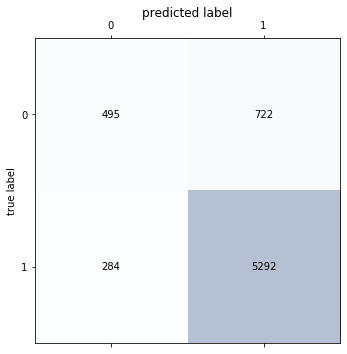

In [ ]:
rdf=RandomForestClassifier(criterion='entropy',class_weight='balanced',n_estimators=10)
rdf.fit(X_tfidf_train,y_tfidf_train)
print_metrics(rdf,X_tfidf_test,y_tfidf_test)
cm=confusion_matrix(y_tfidf_test,rdf.predict(X_tfidf_test))
plot_cm(cm)

50
accuracy: 0.7445726094569534
recall_macro: 0.6680943995304203
precision_macro 0.626662429683688
f1_score 0.6365014212121504


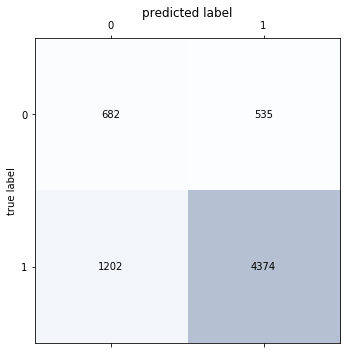


100
accuracy: 0.7730303721083485
recall_macro: 0.6570413334909135
precision_macro 0.6374149815411853
f1_score 0.6452428733476443


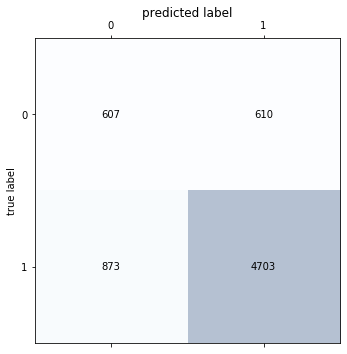


500
accuracy: 0.7802234979439027
recall_macro: 0.6528108941565722
precision_macro 0.6411068397592228
f1_score 0.646188941780505


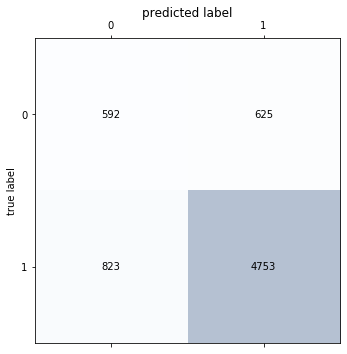

In [ ]:
n=[50,100,500]
score=['accuracy','recall_macro','precision_macro','f1_macro']
for i in n:
    scores=cross_validate(DecisionTreeClassifier(criterion='entropy',class_weight='balanced',max_depth=i),X_tfidf_train,y_tfidf_train,
                          cv=kf_5,scoring=score)
    print(i)
    print('accuracy:',scores['test_accuracy'].mean())
    print('recall_macro:',scores['test_recall_macro'].mean())
    print('precision_macro',scores['test_precision_macro'].mean())
    print('f1_score',scores['test_f1_macro'].mean())
    dtc=DecisionTreeClassifier(criterion='entropy',class_weight='balanced',max_depth=i)
    dtc.fit(X_tfidf_train,y_tfidf_train)
    cm=confusion_matrix(y_tfidf_test,dtc.predict(X_tfidf_test))
    plot_cm(cm)
    print()

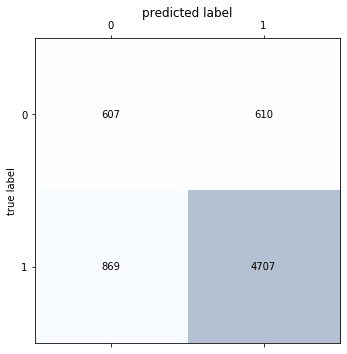

accuracy:0.782
recall:0.671
precision: 0.648
f1_score: 0.658


In [ ]:
dtc=DecisionTreeClassifier(criterion='entropy',class_weight='balanced',max_depth=100)
dtc.fit(X_tfidf_train,y_tfidf_train)
cm=confusion_matrix(y_tfidf_test,dtc.predict(X_tfidf_test))
plot_cm(cm)
print_metrics(dtc,X_tfidf_test,y_tfidf_test)

In [ ]:
n=[0.1,1.0]
score=['accuracy','recall_macro','precision_macro']
for i in n:
    scores=cross_validate(SVC(kernel='linear',C=i,class_weight='balanced'),X_tfidf_train,y_tfidf_train,
                          cv=kf_5,scoring=score)
    print(i)
    print('accuracy:',scores['test_accuracy'].mean())
    print('recall_macro:',scores['test_recall_macro'].mean())
    print('precision_macro',scores['test_precision_macro'].mean())
    print()

0.1
accuracy: 0.8406106475089417
recall_macro: 0.8490589637840067
precision_macro 0.7517315787510036

1.0
accuracy: 0.8512745216126654
recall_macro: 0.8340053182902899
precision_macro 0.7582384239111787



In [ ]:
n=[10]
score=['accuracy','recall_macro','precision_macro']
for i in n:
    scores=cross_validate(SVC(kernel='linear',C=i,class_weight='balanced'),X_tfidf_train,y_tfidf_train,
                          cv=kf_5,scoring=score)
    print(i)
    print('accuracy:',scores['test_accuracy'].mean())
    print('recall_macro:',scores['test_recall_macro'].mean())
    print('precision_macro',scores['test_precision_macro'].mean())
    print()

10
accuracy: 0.8426299930418197
recall_macro: 0.7903031158258773
precision_macro 0.7418174907828179



In [ ]:
svm=SVC(kernel='rbf',C=1.0,gamma=1.0,class_weight='balanced')
svm.fit(X_tfidf_train,y_tfidf_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
n=[0.01,0.1,1.0]
score=['accuracy','recall_macro','precision_macro']
for i in n:
    scores=cross_validate(SVC(kernel='rbf',C=1.0,gamma=i,class_weight='balanced'),X_tfidf_train,y_tfidf_train,
                          cv=kf_5,scoring=score)
    print(i)
    print('accuracy:',scores['test_accuracy'].mean())
    print('recall_macro:',scores['test_recall_macro'].mean())
    print('precision_macro',scores['test_precision_macro'].mean())
    #print('f1_macro',scores['f1_macro'].mean())
    #svm=SVC(kernel='rbf',C=1.0,gamma=i,class_weight='balanced')
    #svm.fit(X_tfidf_train,y_tfidf_train)
    #cm=confusion_matrix(y_tfidf_test,svm.predict(X_tfidf_test))
    #plot_cm(cm)
    print()

0.01
accuracy: 0.8149294476359608
recall_macro: 0.8318764960691659
precision_macro 0.7287863396857946

0.1
accuracy: 0.8480564379094402
recall_macro: 0.850239080211572
precision_macro 0.7582442917779696

1.0
accuracy: 0.8850956973759001
recall_macro: 0.8100598048171493
precision_macro 0.8066091705894148



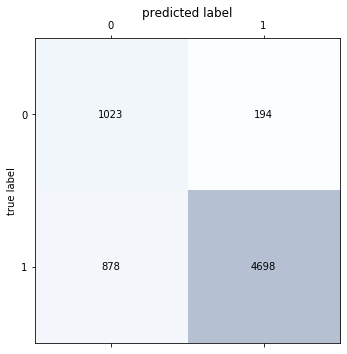

In [ ]:
svm=SVC(kernel='rbf',C=1.0,gamma=0.1,class_weight='balanced')
svm.fit(X_tfidf_train,y_tfidf_train)
cm=confusion_matrix(y_tfidf_test,svm.predict(X_tfidf_test))
plot_cm(cm)

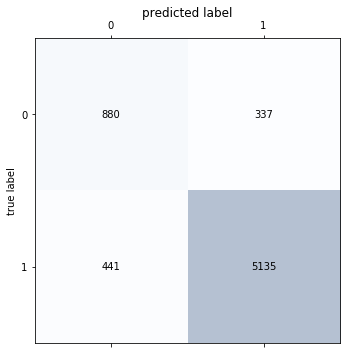

In [ ]:

svm=SVC(kernel='rbf',C=1.0,gamma=1.0,class_weight='balanced')
svm.fit(X_tfidf_train,y_tfidf_train)
cm=confusion_matrix(y_tfidf_test,svm.predict(X_tfidf_test))
plot_cm(cm)